# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Dwi Hadi Yulvi Baskoro
- Email: hadibaskoro910@gmail.com
- Id Dicoding: hadhi_baskoro98

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

## Data Understanding

In [3]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [6]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

,0
EmployeeId,int64
Age,int64
Attrition,float64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64


In [10]:
#Mengecek tipe data unik untuk kolom kategorikal
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print()

Unique values in column 'BusinessTravel':
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']

Unique values in column 'Department':
['Human Resources' 'Research & Development' 'Sales']

Unique values in column 'EducationField':
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique values in column 'Gender':
['Male' 'Female']

Unique values in column 'JobRole':
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative']

Unique values in column 'MaritalStatus':
['Married' 'Single' 'Divorced']

Unique values in column 'Over18':
['Y']

Unique values in column 'OverTime':
['Yes' 'No']



In [11]:
# Memeriksa distribusi target variable (Attrition)
distribubution = df['Attrition'].value_counts()
print(distribubution)
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_counts)

Attrition
0.0    879
1.0    179
Name: count, dtype: int64
Attrition
0.0    83.081285
1.0    16.918715
Name: proportion, dtype: float64


## 3. Data Preparation

In [12]:
# Konversi Attrition menjadi nilai biner (0 dan 1) jika masih berupa string
if df['Attrition'].dtype == 'object':
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [13]:
# Menghapus kolom yang tidak relevan atau redundan
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeId']
df = df.drop(cols_to_drop, axis=1)

### Exploratory Data Analysis (EDA)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setup untuk visualisasi
# plt.style.use('seaborn-whitegrid') # Remove this line
sns.set_style('whitegrid') # Use seaborn's set_style function with a valid style name

plt.rcParams['figure.figsize'] = (12, 8)

# Attrition rate keseluruhan
attrition_rate = df['Attrition'].mean() * 100
print(f"\nOverall Attrition Rate: {attrition_rate:.2f}%")


Overall Attrition Rate: 16.92%


### Analisis Demografis

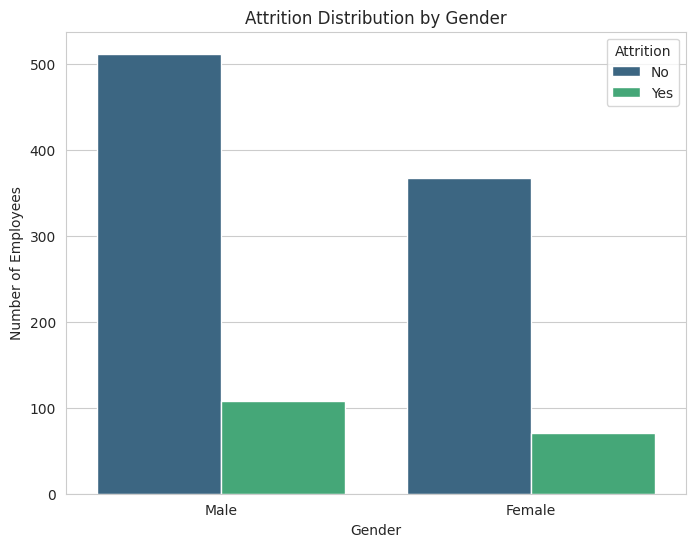


Attrition Rate by Gender:


Attrition,0.0,1.0
Gender,,
Female,83.789954,16.210046
Male,82.580645,17.419355


In [15]:
import matplotlib.pyplot as plt
# Attrition berdasarkan Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

gender_attrition = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by Gender:")
gender_attrition

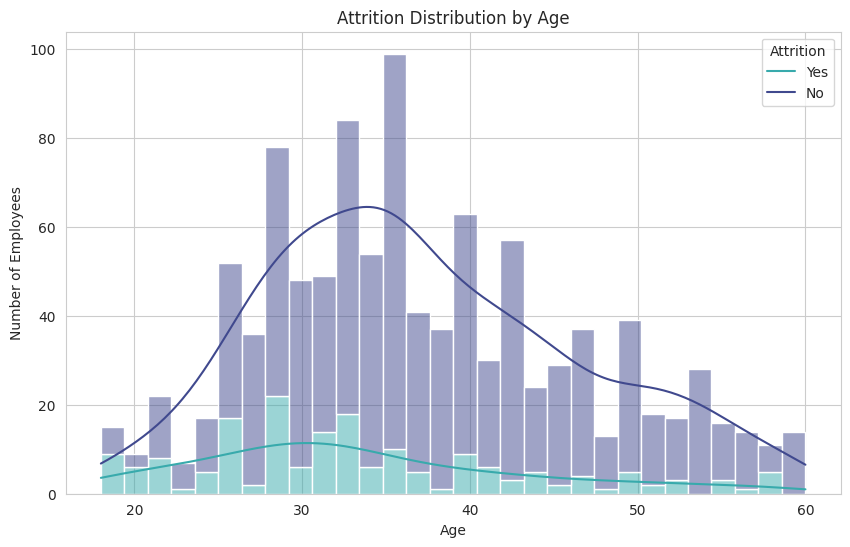

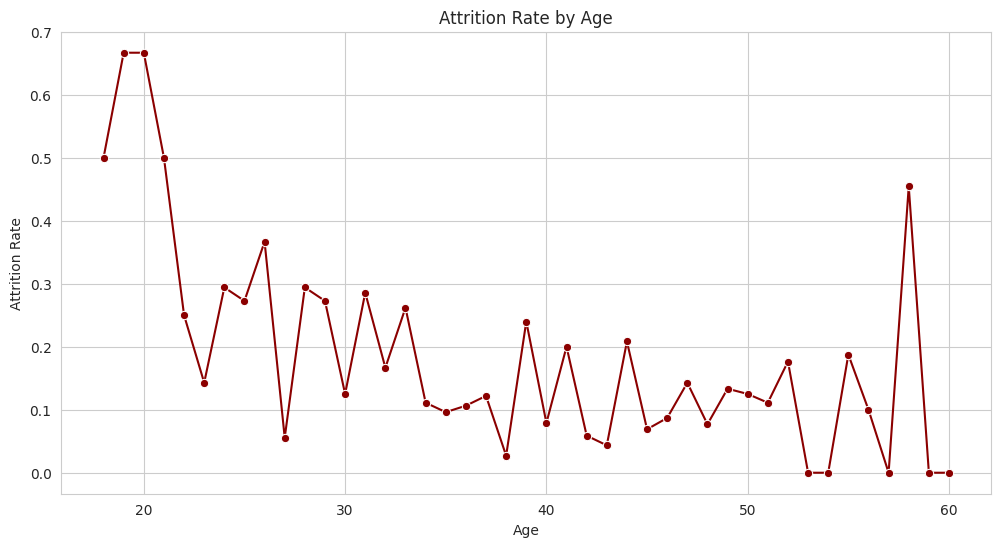

In [16]:
# Attrition berdasarkan Usia
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple="stack", kde=True, palette='mako', bins=30)
plt.title('Attrition Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Yes', 'No'])
plt.show()

age_attrition = df.groupby('Age')['Attrition'].mean().reset_index()
age_attrition.rename(columns={'Attrition': 'AttritionRate'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_attrition, x='Age', y='AttritionRate', marker='o', color='darkred')
plt.title('Attrition Rate by Age')
plt.xlabel('Age')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

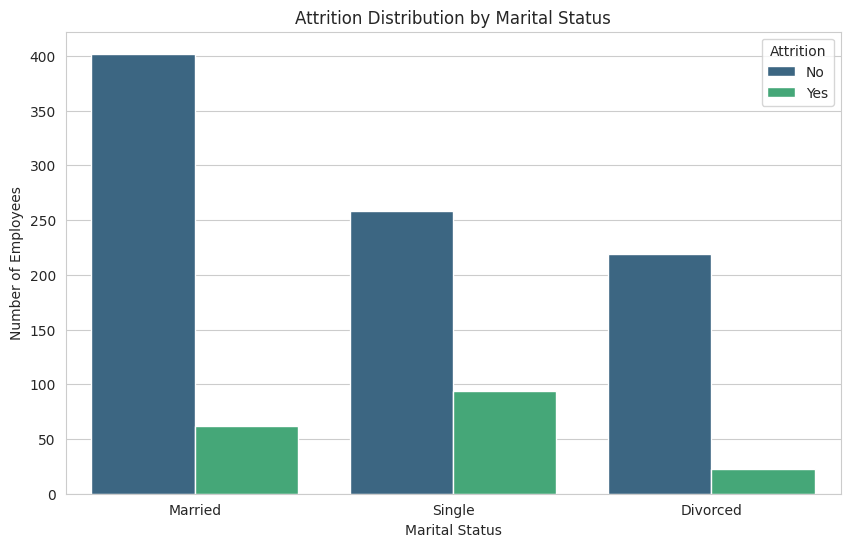


Attrition Rate by Marital Status:


Attrition,0.0,1.0
MaritalStatus,,
Divorced,90.495868,9.504132
Married,86.637931,13.362069
Single,73.295455,26.704545


In [17]:
# Attrition berdasarkan Marital Status
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

marital_attrition = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by Marital Status:")
marital_attrition

#### Analisis Pekerjaan

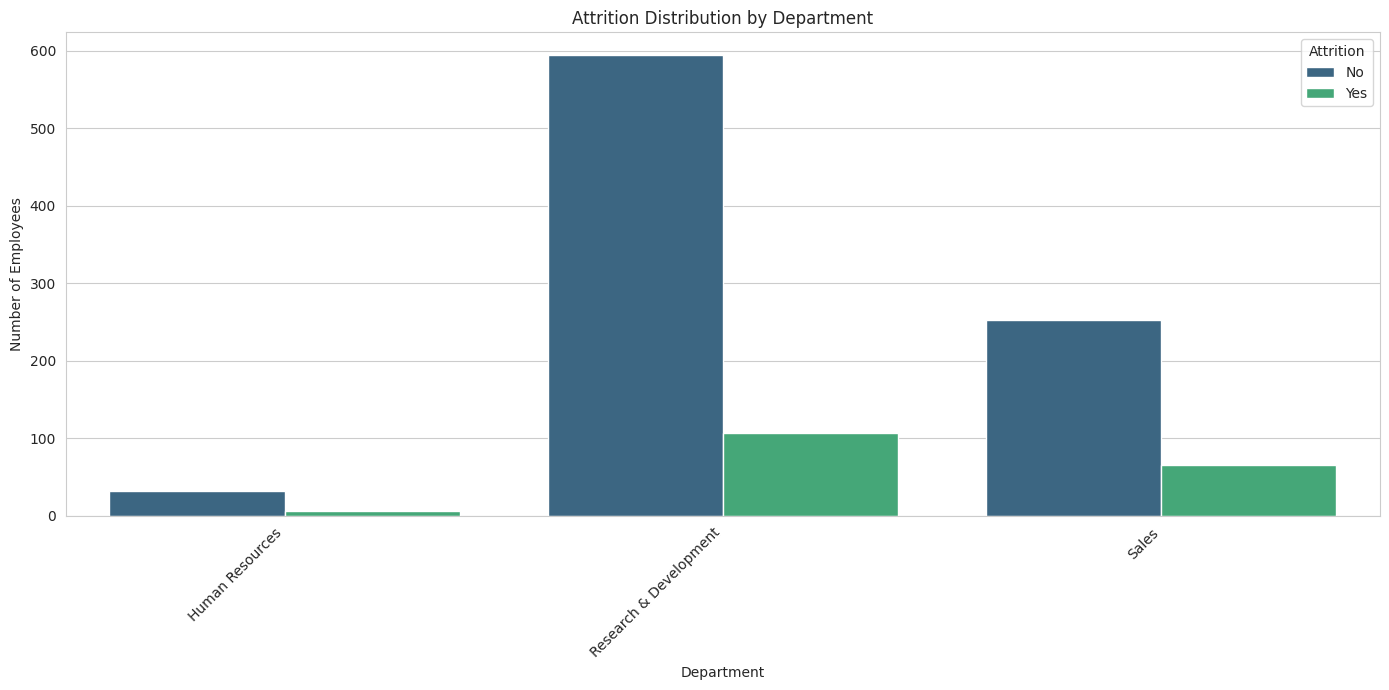


Attrition Rate by Department:


Attrition,0.0,1.0
Department,,
Human Resources,84.210526,15.789474
Research & Development,84.736091,15.263909
Sales,79.310345,20.689655


In [18]:
# Attrition berdasarkan Department
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
sns.countplot(x='Department', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

department_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by Department:")
department_attrition

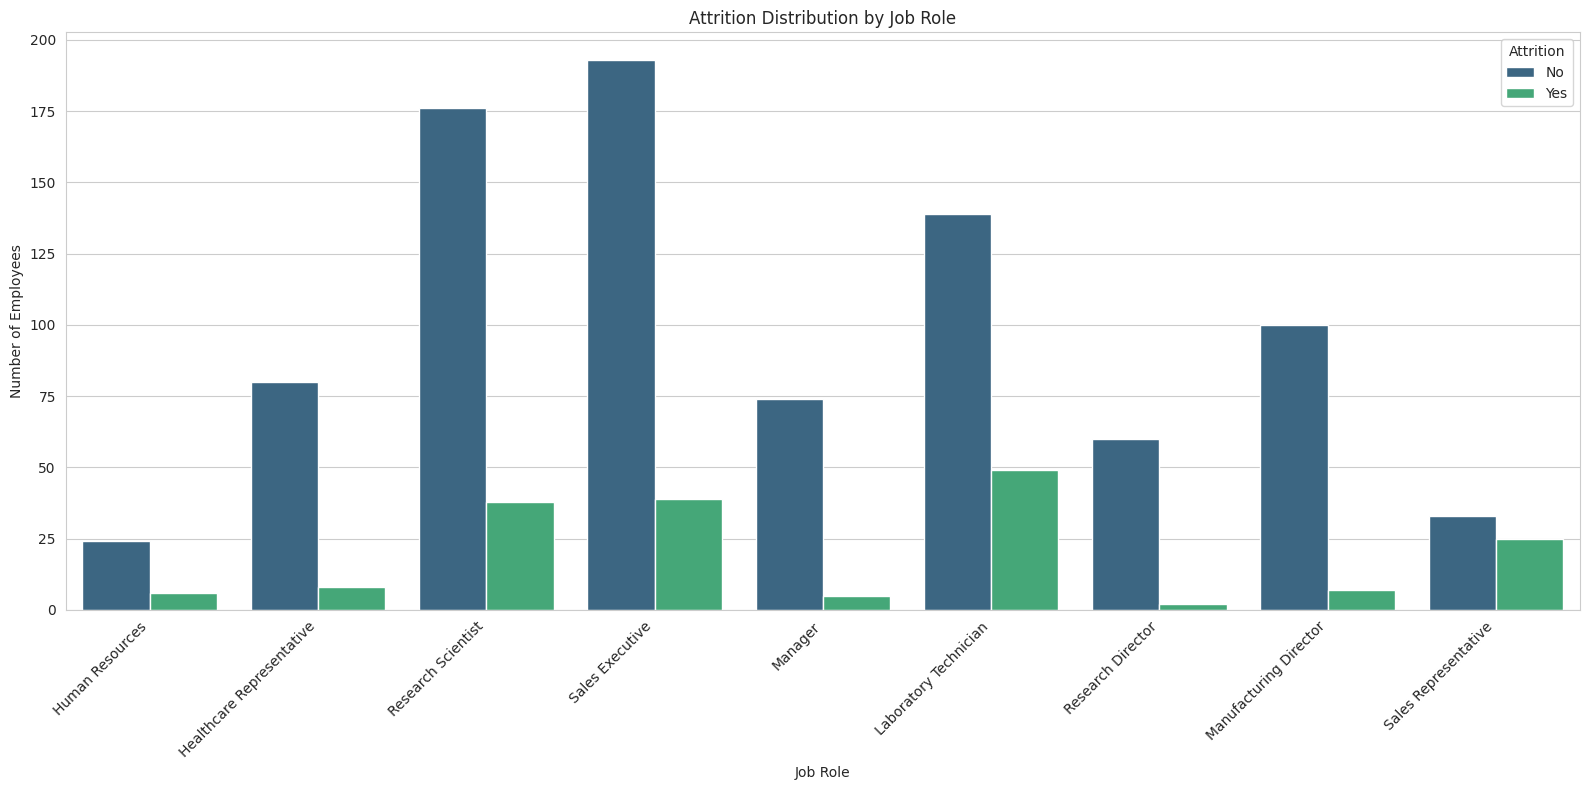


Attrition Rate by Job Role:


Attrition,0.0,1.0
JobRole,,
Healthcare Representative,90.909091,9.090909
Human Resources,80.000000,20.000000
Laboratory Technician,73.936170,26.063830
Manager,93.670886,6.329114
Manufacturing Director,93.457944,6.542056
Research Director,96.774194,3.225806
Research Scientist,82.242991,17.757009
Sales Executive,83.189655,16.810345
Sales Representative,56.896552,43.103448


In [19]:
# Attrition berdasarkan Job Role
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

jobrole_attrition = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by Job Role:")
jobrole_attrition

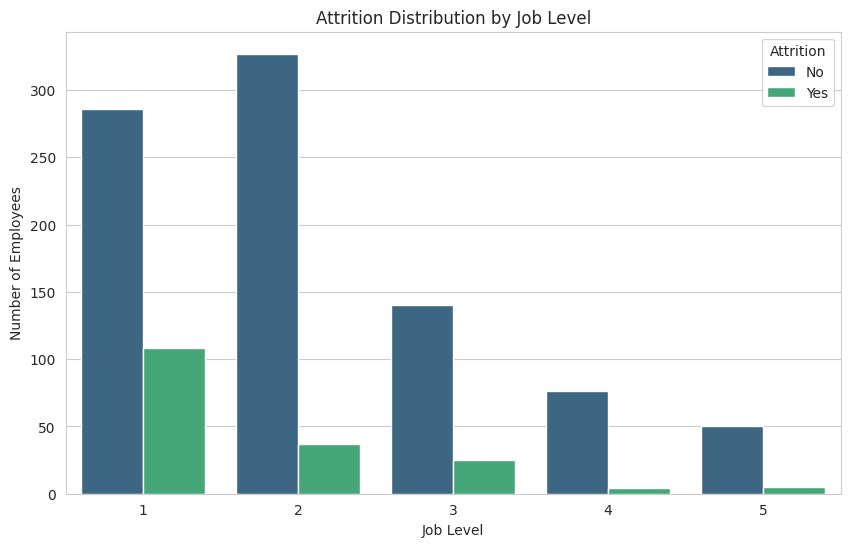


Attrition Rate by Job Level:


Attrition,0.0,1.0
JobLevel,,
1,72.588832,27.411168
2,89.835165,10.164835
3,84.848485,15.151515
4,95.000000,5.000000
5,90.909091,9.090909


In [20]:
# Attrition berdasarkan Job Level
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

joblevel_attrition = df.groupby('JobLevel')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by Job Level:")
joblevel_attrition

#### Analisis Kompensasi

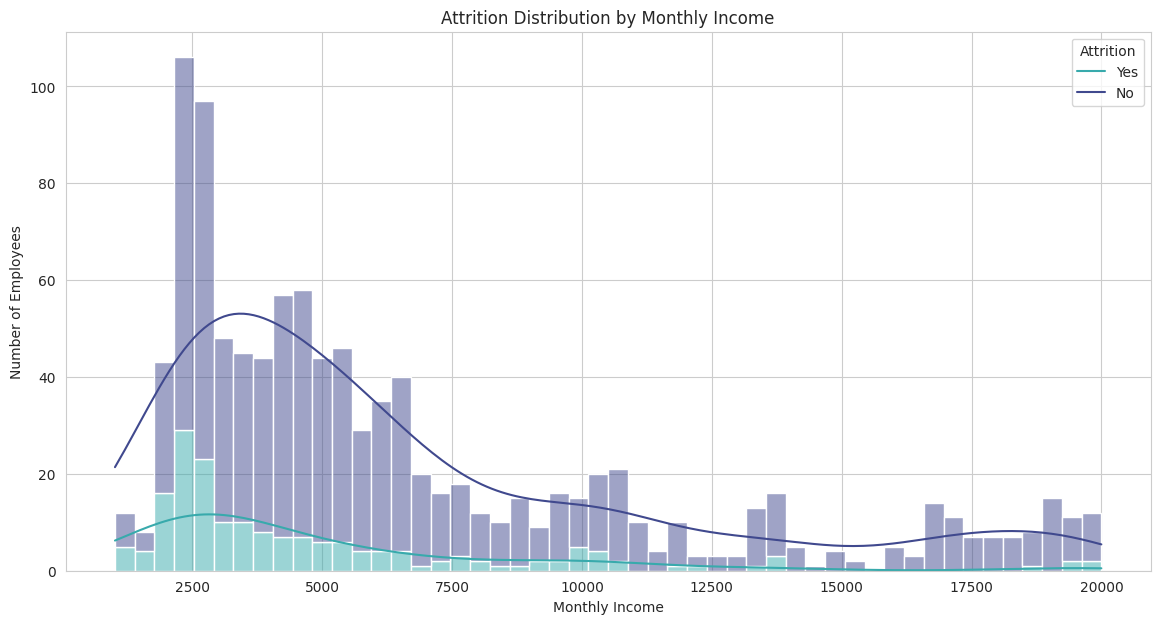


Average Monthly Income by Attrition:
  Attrition  MonthlyIncome
0        No    6982.928328
1       Yes    4872.938547


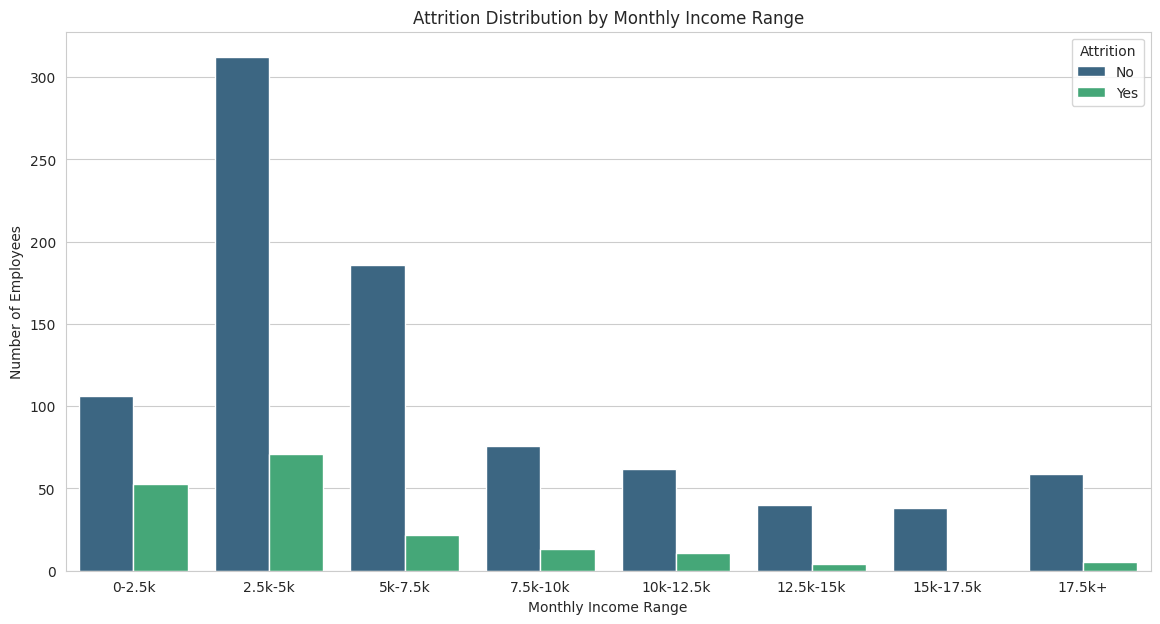


Attrition Rate by Monthly Income Range:
Attrition           0.0        1.0
IncomeRange                       
0-2.5k        66.666667  33.333333
2.5k-5k       81.462141  18.537859
5k-7.5k       89.423077  10.576923
7.5k-10k      85.393258  14.606742
10k-12.5k     84.931507  15.068493
12.5k-15k     90.909091   9.090909
15k-17.5k    100.000000   0.000000
17.5k+        92.187500   7.812500


In [21]:
# Attrition berdasarkan Monthly Income
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple="stack", kde=True, palette='mako', bins=50)
plt.title('Attrition Distribution by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Yes', 'No'])
plt.show()

# Calculate average monthly income for each attrition group
monthlyincome_attrition = df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()
monthlyincome_attrition['Attrition'] = monthlyincome_attrition['Attrition'].map({1: 'Yes', 0: 'No'})
print("\nAverage Monthly Income by Attrition:")
print(monthlyincome_attrition)

# Calculate attrition rate by monthly income ranges (optional: useful for clearer trends)
# Define income ranges
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
labels = ['0-2.5k', '2.5k-5k', '5k-7.5k', '7.5k-10k', '10k-12.5k', '12.5k-15k', '15k-17.5k', '17.5k+']
df['IncomeRange'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(14, 7))
sns.countplot(x='IncomeRange', hue='Attrition', data=df, palette='viridis', order=labels)
plt.title('Attrition Distribution by Monthly Income Range')
plt.xlabel('Monthly Income Range')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

income_range_attrition = df.groupby('IncomeRange')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by Monthly Income Range:")
print(income_range_attrition)

df = df.drop('IncomeRange', axis=1) # Drop the temporary column

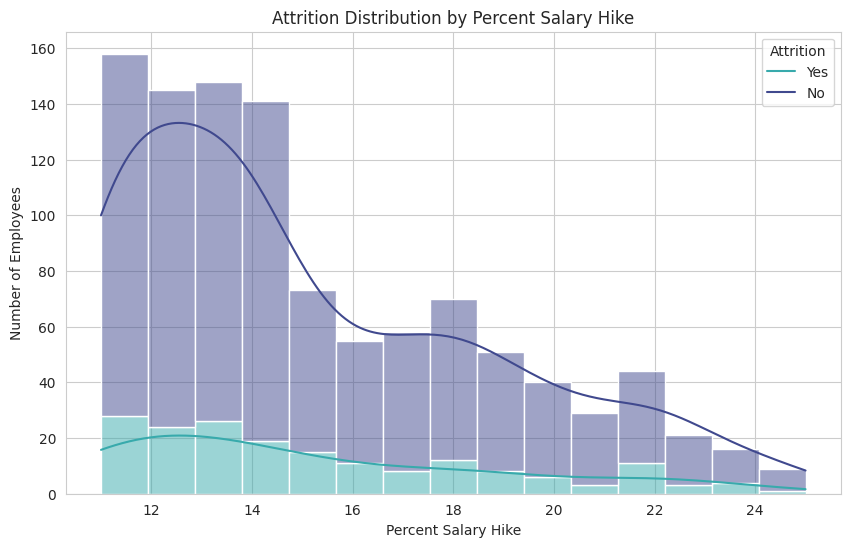


Average Percent Salary Hike by Attrition:


,Attrition,PercentSalaryHike
0,No,15.147895
1,Yes,15.195531


In [22]:
# Attrition berdasarkan Percent Salary Hike
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PercentSalaryHike', hue='Attrition', multiple="stack", kde=True, palette='mako', bins=15)
plt.title('Attrition Distribution by Percent Salary Hike')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Yes', 'No'])
plt.show()

# Calculate average percent salary hike for each attrition group
hike_attrition = df.groupby('Attrition')['PercentSalaryHike'].mean().reset_index()
hike_attrition['Attrition'] = hike_attrition['Attrition'].map({1: 'Yes', 0: 'No'})
print("\nAverage Percent Salary Hike by Attrition:")
hike_attrition

#### Analisis Pengalaman dan Kepuasan

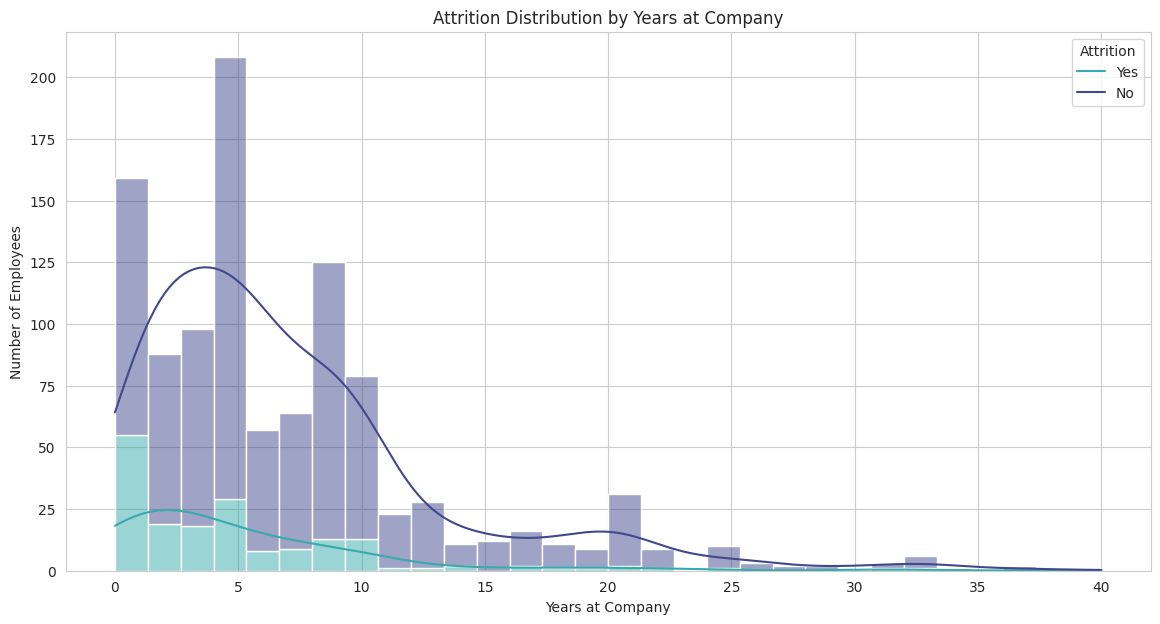


Average Years at Company by Attrition:


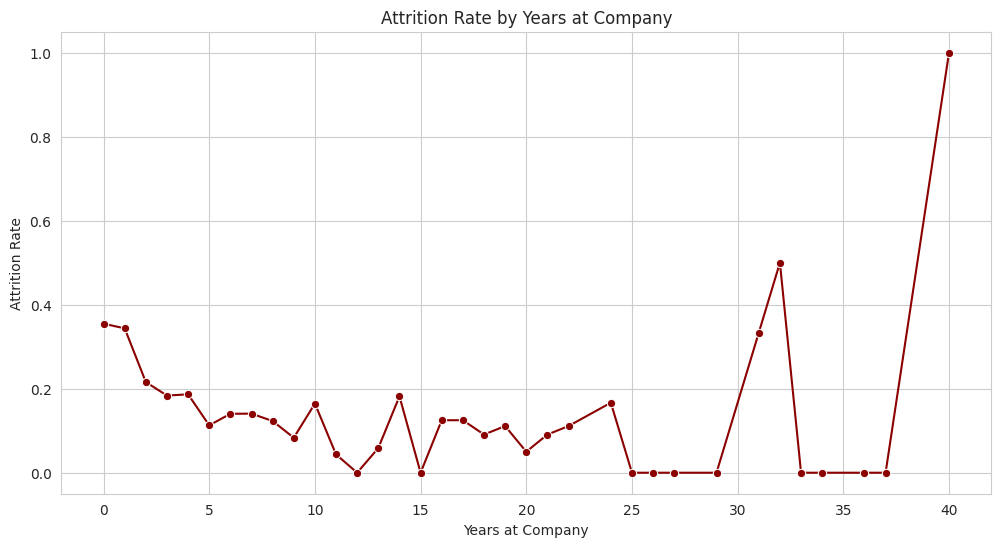

In [23]:
# Attrition berdasarkan Years at Company
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple="stack", kde=True, palette='mako', bins=30)
plt.title('Attrition Distribution by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Yes', 'No'])
plt.show()

# Calculate average years at company for each attrition group
years_at_company_attrition = df.groupby('Attrition')['YearsAtCompany'].mean().reset_index()
years_at_company_attrition['Attrition'] = years_at_company_attrition['Attrition'].map({1: 'Yes', 0: 'No'})
print("\nAverage Years at Company by Attrition:")
years_at_company_attrition

# Calculate attrition rate by YearsAtCompany (optional: can show trends)
years_attrition_rate = df.groupby('YearsAtCompany')['Attrition'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=years_attrition_rate, x='YearsAtCompany', y='Attrition', marker='o', color='darkred')
plt.title('Attrition Rate by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

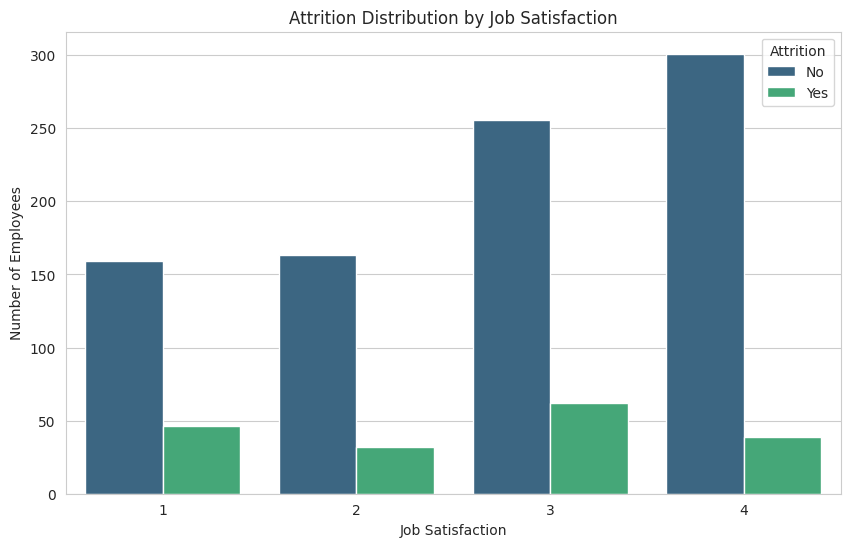


Attrition Rate by Job Satisfaction:


Attrition,0.0,1.0
JobSatisfaction,,
1,77.560976,22.439024
2,83.589744,16.410256
3,80.503145,19.496855
4,88.529412,11.470588


In [24]:
# Attrition berdasarkan Job Satisfaction
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Distribution by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

jobsat_attrition = df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by Job Satisfaction:")
jobsat_attrition

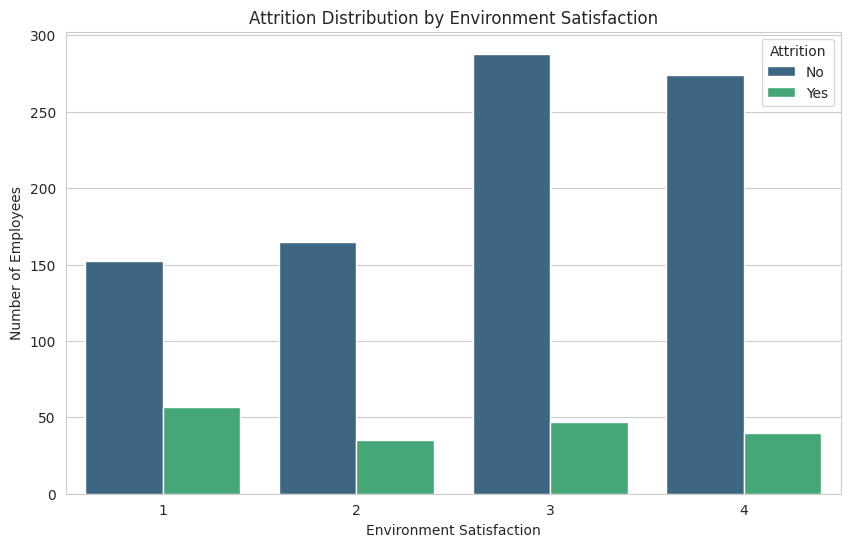


Attrition Rate by Environment Satisfaction:


Attrition,0.0,1.0
EnvironmentSatisfaction,,
1,72.727273,27.272727
2,82.500000,17.500000
3,85.970149,14.029851
4,87.261146,12.738854


In [25]:
# Attrition berdasarkan Environment Satisfaction
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Distribution by Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

envsat_attrition = df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by Environment Satisfaction:")
envsat_attrition

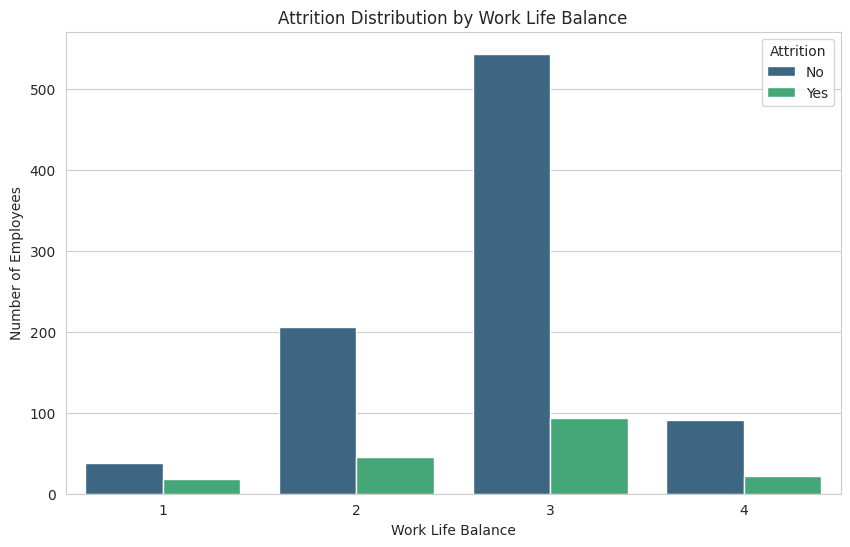


Attrition Rate by Work Life Balance:


Attrition,0.0,1.0
WorkLifeBalance,,
1,67.857143,32.142857
2,82.071713,17.928287
3,85.266458,14.733542
4,80.530973,19.469027


In [26]:
# Attrition berdasarkan Work Life Balance

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Distribution by Work Life Balance')
plt.xlabel('Work Life Balance')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

wlb_attrition = df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by Work Life Balance:")
wlb_attrition

#### Analisis Work-Life Balance dan Overtime

In [27]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


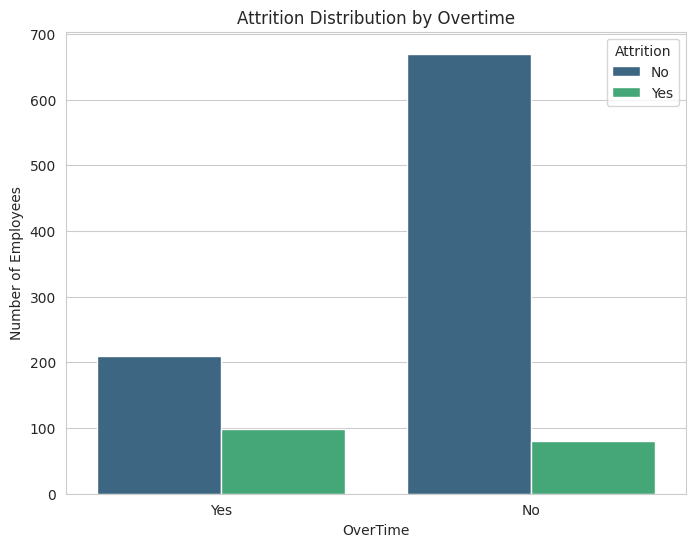


Attrition Rate by OverTime:


Attrition,0.0,1.0
OverTime,,
No,89.214381,10.785619
Yes,68.078176,31.921824


In [28]:
# Attrition berdasarkan Overtime
import matplotlib.pyplot as plt
import seaborn as sns # Ensure seaborn is imported if not globally
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Distribution by Overtime')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

overtime_attrition = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack() * 100
print("\nAttrition Rate by OverTime:")
overtime_attrition

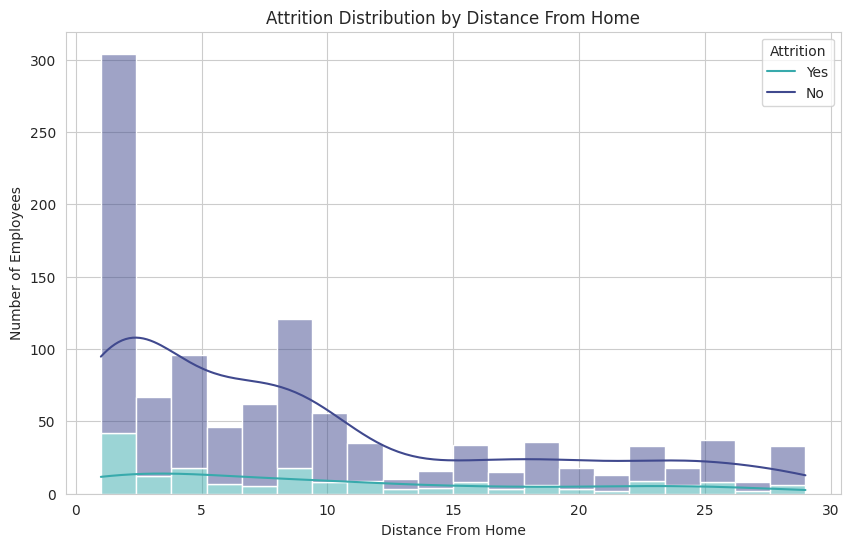

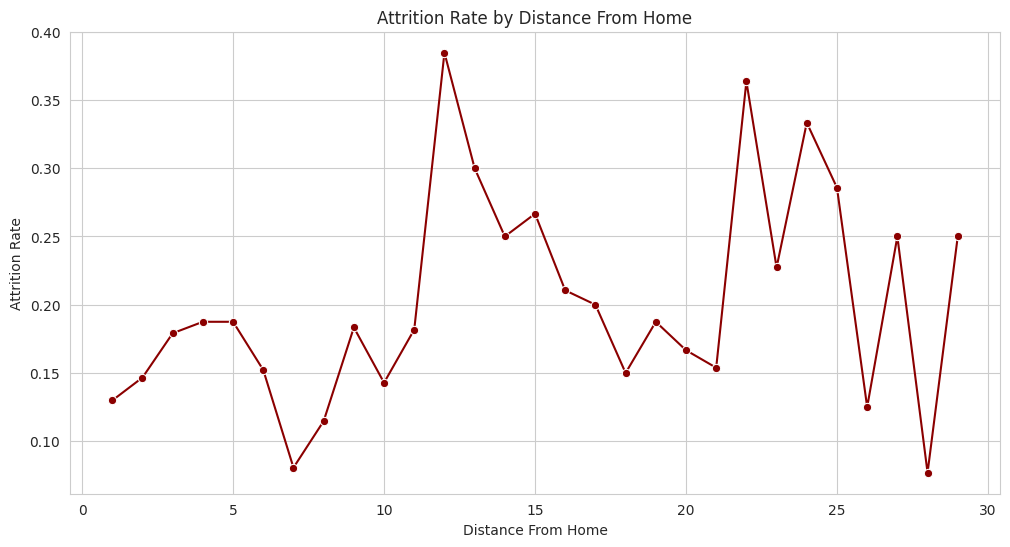


Average Distance From Home by Attrition:


,Attrition,DistanceFromHome
0,No,8.695108
1,Yes,10.368715


In [29]:
# Attrition berdasarkan Distance From Home

import matplotlib.pyplot as plt
# Attrition berdasarkan Distance From Home
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DistanceFromHome', hue='Attrition', multiple="stack", kde=True, palette='mako', bins=20)
plt.title('Attrition Distribution by Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Yes', 'No'])
plt.show()

# Calculate attrition rate by DistanceFromHome (optional: can show trends)
distance_attrition_rate = df.groupby('DistanceFromHome')['Attrition'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=distance_attrition_rate, x='DistanceFromHome', y='Attrition', marker='o', color='darkred')
plt.title('Attrition Rate by Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()

# Calculate average distance from home for each attrition group
distance_attrition = df.groupby('Attrition')['DistanceFromHome'].mean().reset_index()
distance_attrition['Attrition'] = distance_attrition['Attrition'].map({1: 'Yes', 0: 'No'})
print("\nAverage Distance From Home by Attrition:")
distance_attrition

#### Perhitungan Attrition Rate untuk Berbagai Kategori

In [30]:
# Function untuk menghitung attrition rate berdasarkan kategori
def calculate_attrition_rate(df, column):
    attrition_by_category = df.groupby(column)['Attrition'].mean() * 100
    return attrition_by_category.sort_values(ascending=False)

# Hitung dan tampilkan attrition rate berdasarkan Department
department_attrition_rate = calculate_attrition_rate(df, 'Department')
print("\nAttrition Rate (%) by Department:")
department_attrition_rate


Attrition Rate (%) by Department:


,Attrition
Department,
Sales,20.689655
Human Resources,15.789474
Research & Development,15.263909


In [31]:
# Attrition rate berdasarkan Job Role
JobRole_attrition_rate = calculate_attrition_rate(df, 'JobRole')
print("\nAttrition Rate by Job Role:")
JobRole_attrition_rate


Attrition Rate by Job Role:


,Attrition
JobRole,
Sales Representative,43.103448
Laboratory Technician,26.063830
Human Resources,20.000000
Research Scientist,17.757009
Sales Executive,16.810345
Healthcare Representative,9.090909
Manufacturing Director,6.542056
Manager,6.329114
Research Director,3.225806


In [32]:
# Attrition rate berdasarkan Gender
gender_attritation_rate = calculate_attrition_rate(df, 'Gender')
print("\nAttrition Rate by Gender:")
gender_attritation_rate


Attrition Rate by Gender:


,Attrition
Gender,
Male,17.419355
Female,16.210046


In [33]:
# Attrition rate berdasarkan MaritalStatus
marital_attrition_rate = calculate_attrition_rate(df, 'MaritalStatus')
print("\nAttrition Rate by Marital Status:")
marital_attrition_rate


Attrition Rate by Marital Status:


,Attrition
MaritalStatus,
Single,26.704545
Married,13.362069
Divorced,9.504132


In [34]:
# Attrition rate berdasarkan OverTime
overtime_attrition_rate = calculate_attrition_rate(df, 'OverTime')
print("\nAttrition Rate by Overtime:")
overtime_attrition_rate


Attrition Rate by Overtime:


,Attrition
OverTime,
Yes,31.921824
No,10.785619


In [35]:
# Attrition rate berdasarkan Department
department_attrition_rate = calculate_attrition_rate(df, 'Department')
print("\nAttrition Rate by Department:")
department_attrition_rate



Attrition Rate by Department:


,Attrition
Department,
Sales,20.689655
Human Resources,15.789474
Research & Development,15.263909


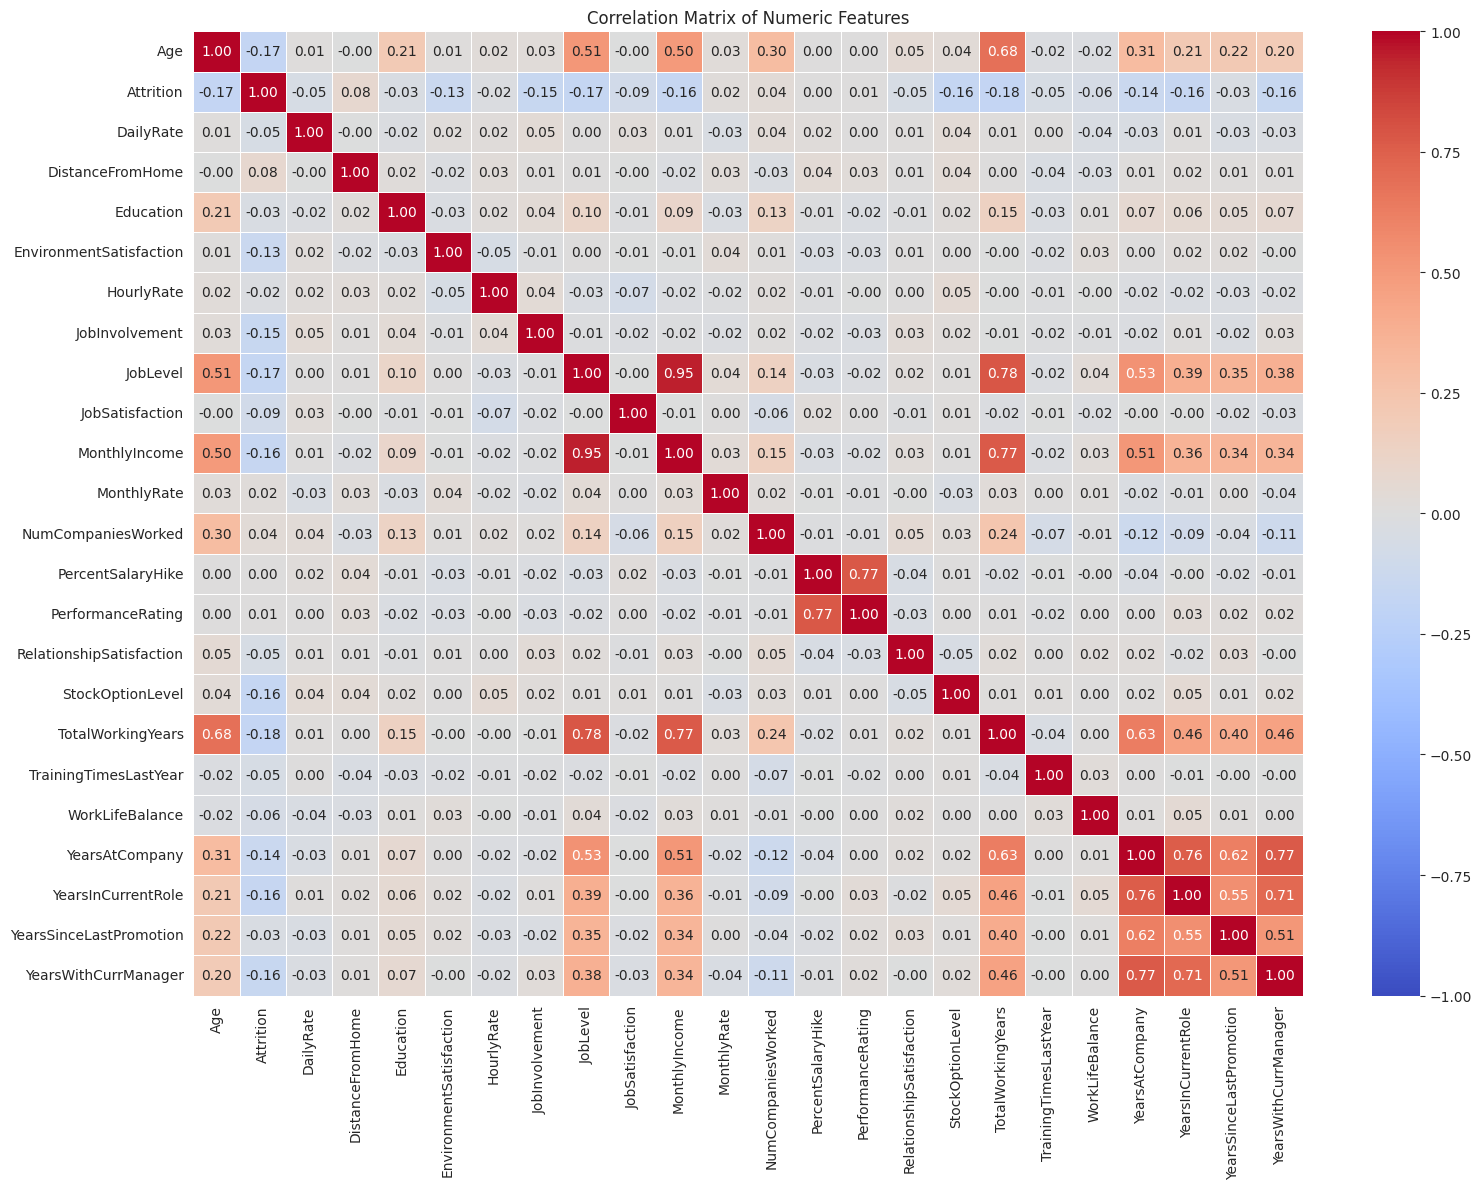

In [36]:
# Korelasi antar variabel numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi
correlation = numeric_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

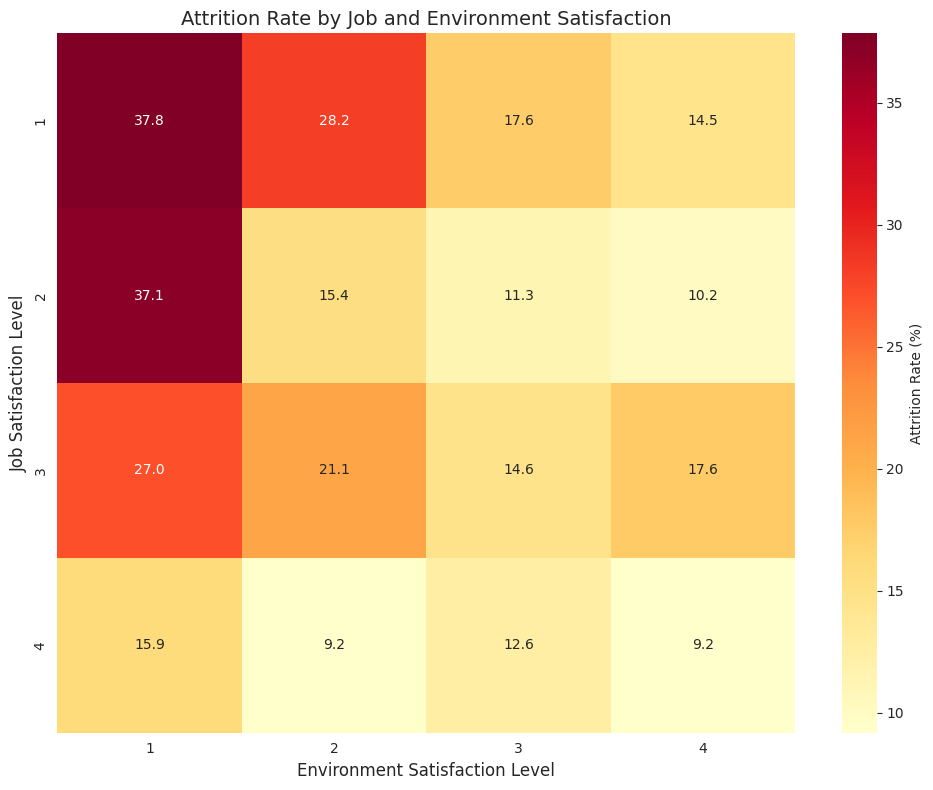

In [37]:
# 3. Satisfaction metrics analysis
def plot_satisfaction_heatmap(df):
    # Create pivot table for job and environment satisfaction
    job_env_pivot = pd.pivot_table(
        df,
        values='Attrition',
        index='JobSatisfaction',
        columns='EnvironmentSatisfaction',
        aggfunc=np.mean
    ) * 100

    plt.figure(figsize=(10, 8))
    sns.heatmap(job_env_pivot, annot=True, cmap="YlOrRd", fmt='.1f',
                cbar_kws={'label': 'Attrition Rate (%)'})
    plt.title('Attrition Rate by Job and Environment Satisfaction', fontsize=14)
    plt.xlabel('Environment Satisfaction Level', fontsize=12)
    plt.ylabel('Job Satisfaction Level', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_satisfaction_heatmap(df)

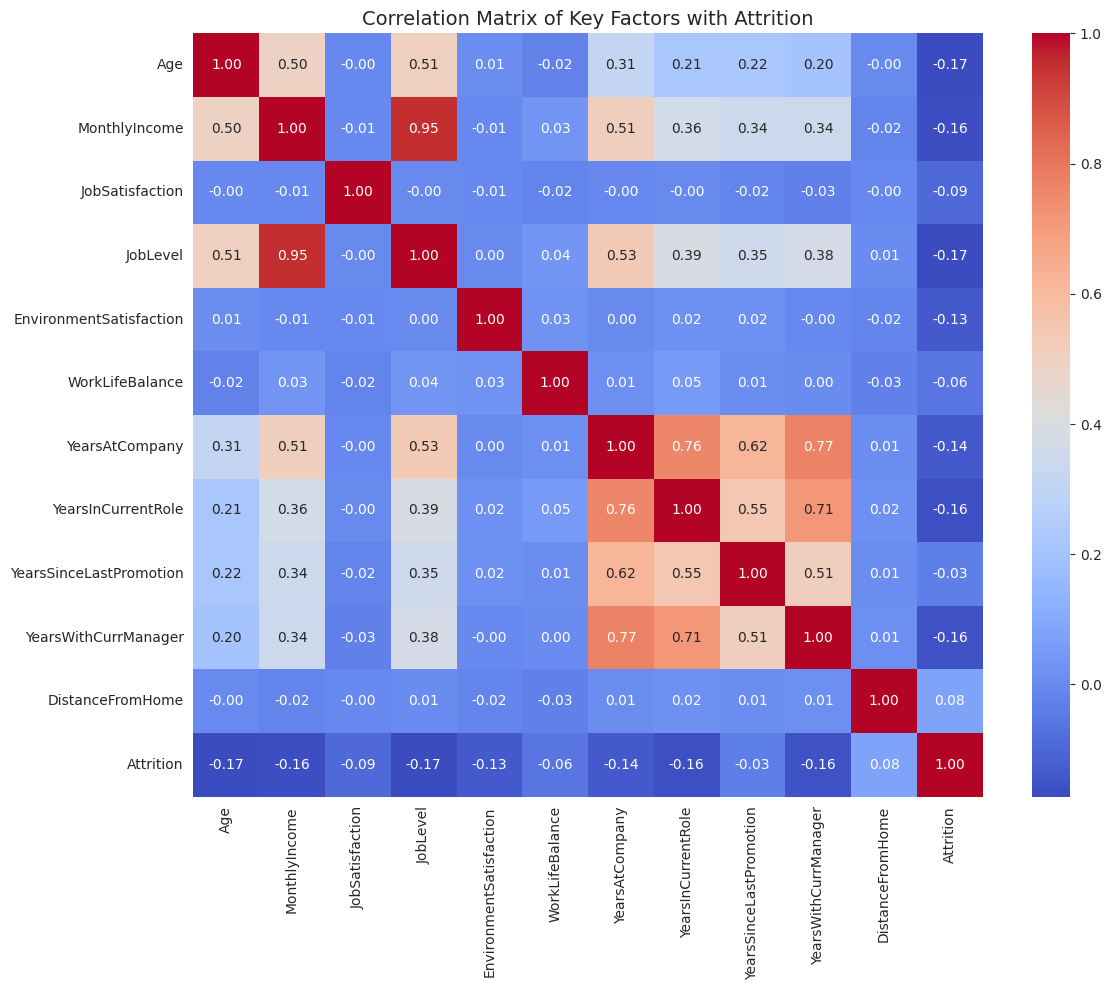

In [38]:
# 4. Create correlation matrix for key variables
correlation_vars = [
    'Age', 'MonthlyIncome', 'JobSatisfaction', 'JobLevel',
    'EnvironmentSatisfaction', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'DistanceFromHome', 'Attrition'
]

correlation_matrix = df[correlation_vars].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Factors with Attrition', fontsize=14)
plt.tight_layout()
plt.show()

Removing 412 rows with NaN in the target variable 'Attrition' for feature importance.


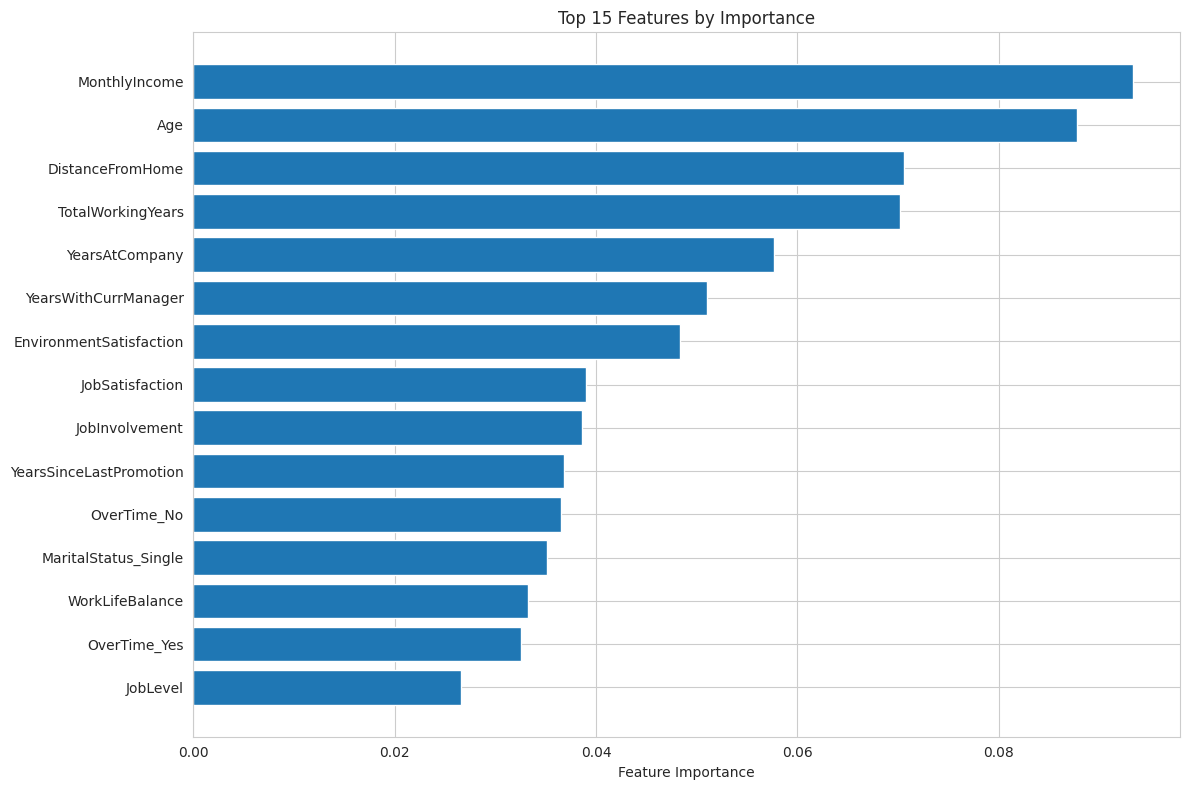

Top 15 most important features identified


In [39]:
# Define categorical and numerical features
categorical_features = [
    'Department', 'JobRole', 'MaritalStatus',
    'OverTime', 'BusinessTravel', 'EducationField'
]

numerical_features = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears',
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance',
    'JobLevel', 'JobInvolvement', 'PerformanceRating', 'WorkLifeImbalance',
    'AvgSatisfaction', 'CareerGrowthStagnation', 'OverTime_Binary',
    'CompensationToJobLevelRatio' # Include the new feature
]

# Add the newly created features to the list of numerical features if they were not already there
# This handles cases where the columns might have been created before defining the list
newly_created_numerical = ['AvgSatisfaction', 'CareerGrowthStagnation', 'WorkLifeImbalance', 'OverTime_Binary', 'CompensationToJobLevelRatio']
for col in newly_created_numerical:
    if col in df.columns and col not in numerical_features:
        numerical_features.append(col)

# Ensure all features exist in the dataframe before selecting columns
all_features = categorical_features + numerical_features
missing_features = [col for col in all_features if col not in df.columns]
if missing_features:
    print(f"Warning: The following features are missing from the DataFrame: {missing_features}")
    # Remove missing features from the lists
    categorical_features = [col for col in categorical_features if col in df.columns]
    numerical_features = [col for col in numerical_features if col in df.columns]
    all_features = categorical_features + numerical_features


# Feature importance visualization using Random Forest
X = df[all_features].copy() # Make a copy to avoid SettingWithCopyWarning
y = df['Attrition'].copy() # Make a copy


# --- FIX: Remove rows with NaN in target variable BEFORE splitting ---
nan_in_y = y.isnull()
if nan_in_y.any():
    print(f"Removing {nan_in_y.sum()} rows with NaN in the target variable 'Attrition' for feature importance.")
    X = X[~nan_in_y]
    y = y[~nan_in_y]
# --- End of FIX ---


# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Random Forest model for feature importance
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
# Note: train_test_split here is just for the feature importance step,
# which trains on a subset. The main model training happens later.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_pipeline.fit(X_train, y_train)

# Extract feature names for feature importance
feature_names = []

# Get numerical feature names
feature_names.extend(numerical_features)

# Get categorical feature names
# Ensure the preprocessor has been fitted before accessing transformers_ and named_transformers_
# This is handled by rf_pipeline.fit() above.
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_features = list(ohe.get_feature_names_out(categorical_features))
feature_names.extend(cat_features)


# Get feature importances
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Get the indices of the top 15 features
top_n = 15
top_indices = np.argsort(feature_importances)[-top_n:]

# Plot the feature importances of the top features
plt.figure(figsize=(12, 8))
plt.barh([str(feature_names[i]) for i in top_indices],
         [feature_importances[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Features by Importance')
plt.tight_layout()
plt.show()

print(f"Top {top_n} most important features identified")

### 5. Modeling

Removing 412 rows with NaN in the target variable 'Attrition' for modeling.
Training data shape: (740, 19)
Testing data shape: (318, 19)
Training target distribution:
Attrition
0.0    0.831081
1.0    0.168919
Name: proportion, dtype: float64
Testing target distribution:
Attrition
0.0    0.830189
1.0    0.169811
Name: proportion, dtype: float64

Training the Random Forest model...
Training complete.

Evaluation Results:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       264
         1.0       0.75      0.17      0.27        54

    accuracy                           0.85       318
   macro avg       0.80      0.58      0.59       318
weighted avg       0.84      0.85      0.81       318

Confusion Matrix:
[[261   3]
 [ 45   9]]


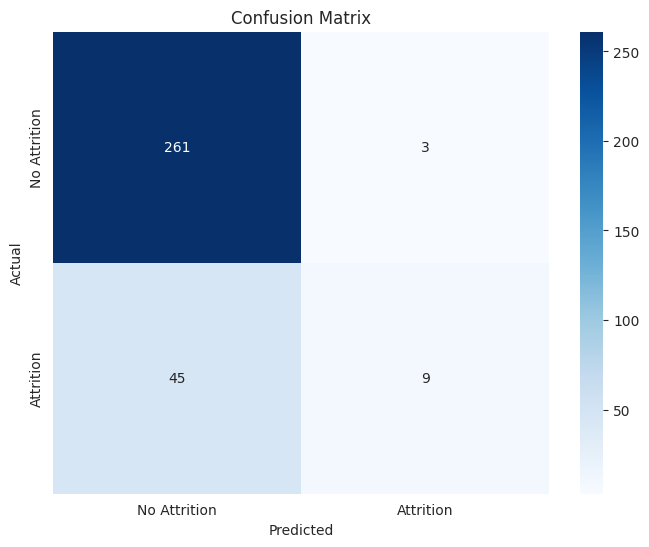

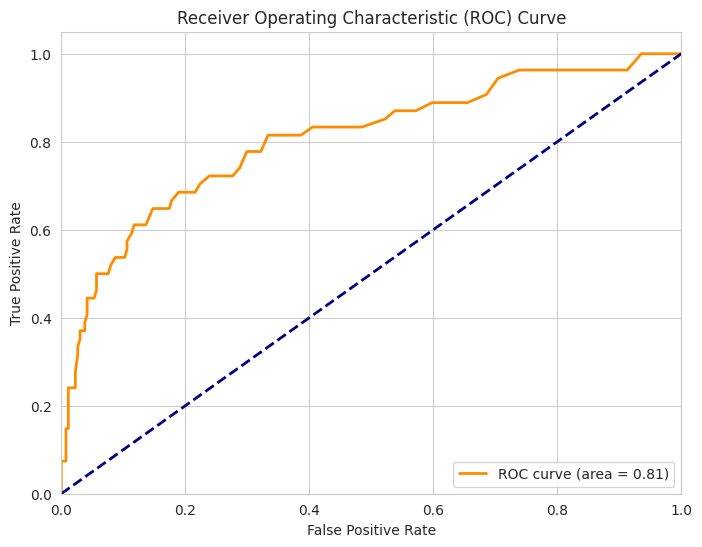

ROC AUC Score: 0.81

Sample Predictions vs Actual:
      Actual  Predicted  Probability_Attrition
498      1.0        0.0                  0.225
735      0.0        0.0                  0.025
1463     0.0        0.0                  0.060
840      0.0        0.0                  0.110
542      0.0        0.0                  0.280


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
# Split data into training and testing sets
X = df[all_features].copy() # Make a copy to avoid SettingWithCopyWarning
y = df['Attrition'].copy() # Make a copy

# --- FIX: Remove rows with NaN in target variable BEFORE splitting ---
nan_in_y = y.isnull()
if nan_in_y.any():
    print(f"Removing {nan_in_y.sum()} rows with NaN in the target variable 'Attrition' for modeling.")
    X = X[~nan_in_y]
    y = y[~nan_in_y]
# --- End of FIX ---


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Use stratify for imbalanced dataset

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing target distribution:\n{y_test.value_counts(normalize=True)}")

# Define the full preprocessing and modeling pipeline
# Use the preprocessor defined in the feature importance section
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')) # Added class_weight
])

# Train the model
print("\nTraining the Random Forest model...")
model_pipeline.fit(X_train, y_train)
print("Training complete.")

# ### 6. Evaluation
# Make predictions
y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (Attrition=1)

# Evaluate the model
print("\nEvaluation Results:")
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC Score: {roc_auc:.2f}")

# Display some predictions vs actual
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability_Attrition': y_proba})
print("\nSample Predictions vs Actual:")
print(results_df.head())

## Evaluation

In [41]:
# Display some predictions vs actual
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability_Attrition': y_proba})
print("\nSample Predictions vs Actual:")
print(results_df.head())


Sample Predictions vs Actual:
      Actual  Predicted  Probability_Attrition
498      1.0        0.0                  0.225
735      0.0        0.0                  0.025
1463     0.0        0.0                  0.060
840      0.0        0.0                  0.110
542      0.0        0.0                  0.280


In [42]:
#SIMPAN MODEL
import joblib

nama_file_model = 'random_forest_classifier_model.joblib'

# Simpan model ke file
# Ganti 'model_klasifikasi' dengan nama variabel model Anda
# Mengganti model_klasifikasi dengan model_pipeline yang sudah dilatih
joblib.dump(model_pipeline, nama_file_model)

print(f"Model telah disimpan ke file '{nama_file_model}'")

Model telah disimpan ke file 'random_forest_classifier_model.joblib'


## Prediction

In [43]:
import joblib
import pandas as pd

# --- KONFIGURASI ---
MODEL_TYPE = 'classification'
MODEL_PATH = 'random_forest_classifier_model.joblib'  # ganti sesuai nama model

def predict(data_input):
    """
    Prediksi menggunakan model Random Forest (classification).
    """
    try:
        # 1. Load model
        model = joblib.load(MODEL_PATH)
        print("✅ Model berhasil dimuat.")

        # 2. Convert input dict ke DataFrame
        input_df = pd.DataFrame([data_input])
        print("📄 Data yang diprediksi:\n", input_df)

        # 3. Prediksi
        prediction = model.predict(input_df)[0]

        # 4. Interpretasi hasil
        if MODEL_TYPE == 'classification':
            if prediction == 1:
                return "🔴 Prediksi: Karyawan kemungkinan AKAN KELUAR (Attrition = 1)."
            else:
                return "🟢 Prediksi: Karyawan kemungkinan TETAP BEKERJA (Attrition = 0)."
        else:
            return f"Hasil prediksi: {prediction:.2f}"

    except FileNotFoundError:
        return f"❌ Error: Model tidak ditemukan di path '{MODEL_PATH}'"
    except Exception as e:
        return f"❌ Terjadi error saat prediksi: {e}"

# --- CONTOH PENGGUNAAN ---
if __name__ == "__main__":
    # Data input harus cocok dengan fitur asli sebelum preprocessing
    data_baru = {
        'Age': 30,
        'BusinessTravel': 'Travel_Rarely',
        'DailyRate': 800,
        'Department': 'Sales',
        'DistanceFromHome': 3,
        'Education': 2,
        'EducationField': 'Marketing',
        'EnvironmentSatisfaction': 4,
        'Gender': 'Female',
        'HourlyRate': 65,
        'JobInvolvement': 3,
        'JobLevel': 2,
        'JobRole': 'Sales Executive',
        'JobSatisfaction': 2,
        'MaritalStatus': 'Single',
        'MonthlyIncome': 5500,
        'MonthlyRate': 20000,
        'NumCompaniesWorked': 1,
        'OverTime': 'Yes',
        'PercentSalaryHike': 12,
        'PerformanceRating': 3,
        'RelationshipSatisfaction': 3,
        'StockOptionLevel': 0,
        'TotalWorkingYears': 7,
        'TrainingTimesLastYear': 2,
        'WorkLifeBalance': 2,
        'YearsAtCompany': 5,
        'YearsInCurrentRole': 2,
        'YearsSinceLastPromotion': 1,
        'YearsWithCurrManager': 3
    }

    hasil = predict(data_baru)
    print("-" * 40)
    print(hasil)
    print("-" * 40)


✅ Model berhasil dimuat.
📄 Data yang diprediksi:
    Age BusinessTravel  DailyRate Department  DistanceFromHome  Education  \
0   30  Travel_Rarely        800      Sales                 3          2   

  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0      Marketing                        4  Female          65  ...   

   PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
0                  3                         3                0   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  7                     2                2               5   

   YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  
0                   2                       1                     3  

[1 rows x 30 columns]
----------------------------------------
🟢 Prediksi: Karyawan kemungkinan TETAP BEKERJA (Attrition = 0).
----------------------------------------


In [44]:
%%writefile prediction.py

import pandas as pd
import joblib
import warnings

warnings.filterwarnings('ignore')

# --- KONFIGURASI ---
# Pastikan path ini sesuai dengan lokasi model Anda
MODEL_PATH = 'random_forest_classifier_model.joblib'
MODEL_TYPE = 'classification' # Atau 'regression' jika model Anda regresi

def predict(data_input):
    """
    Prediksi menggunakan model Random Forest (classification) yang sudah disimpan.

    Args:
        data_input (dict): Kamus (dictionary) berisi fitur-fitur karyawan yang ingin diprediksi.
                           Kunci (keys) kamus harus sesuai dengan nama kolom fitur
                           yang digunakan saat melatih model, termasuk urutan dan kapitalisasi.

    Returns:
        str: String yang berisi hasil prediksi atau pesan error.
    """
    try:
        # 1. Load model
        model = joblib.load(MODEL_PATH)
        print("✅ Model berhasil dimuat.")

        # 2. Convert input dict ke DataFrame
        # Pastikan urutan kolom di DataFrame input sesuai dengan urutan kolom
        # saat model dilatih. Cara paling aman adalah membuat DataFrame
        # dengan urutan kolom yang sama seperti X_train.
        # Jika Anda tidak menyimpan urutan kolom X_train, Anda mungkin perlu
        # memuat data asli atau menyesuaikan urutan secara manual.
        # Contoh sederhana di bawah ini mengasumsikan keys di data_input
        # sudah dalam urutan yang benar atau model pipeline dapat menanganinya
        # (misalnya, jika preprocessor menggunakan ColumnTransformer dengan nama kolom).
        # Namun, cara yang lebih robust adalah menyimpan urutan kolom X_train
        # saat pelatihan dan menggunakannya di sini.

        # Asumsi: Keys dalam data_input sudah sesuai dengan fitur yang diharapkan model
        # Jika tidak yakin, simpanlah urutan kolom X_train saat pelatihan.
        # Contoh:
        # import pickle
        # with open('feature_order.pkl', 'wb') as f:
        #     pickle.dump(X_train.columns.tolist(), f)
        # Dan di sini:
        # with open('feature_order.pkl', 'rb') as f:
        #     feature_order = pickle.load(f)
        # input_df = pd.DataFrame([data_input])[feature_order]

        # Untuk saat ini, kita asumsikan keys data_input sudah benar:
        input_df = pd.DataFrame([data_input])

        print("📄 Data yang akan diprediksi:\n", input_df)

        # 3. Prediksi
        # predict() akan menjalankan seluruh pipeline (preprocessing + classifier)
        prediction = model.predict(input_df)[0]

        # Jika Anda juga ingin probabilitas (untuk klasifikasi)
        if MODEL_TYPE == 'classification':
             prediction_proba = model.predict_proba(input_df)[:, 1][0] # Probabilitas kelas positif (Attrition=1)

        # 4. Interpretasi hasil
        if MODEL_TYPE == 'classification':
            if prediction == 1:
                return f"🔴 Prediksi: Karyawan kemungkinan AKAN KELUAR (Attrition = 1) dengan probabilitas {prediction_proba:.2f}."
            else:
                return f"🟢 Prediksi: Karyawan kemungkinan TETAP BEKERJA (Attrition = 0) dengan probabilitas {1 - prediction_proba:.2f}."
        elif MODEL_TYPE == 'regression':
             return f"Hasil prediksi (regression): {prediction:.2f}"
        else:
             return "Jenis model tidak dikenali."


    except FileNotFoundError:
        return f"❌ Error: Model tidak ditemukan di path '{MODEL_PATH}'. Pastikan Anda sudah menjalankan sel yang menyimpan model dan pathnya benar."
    except KeyError as e:
         return f"❌ Error: Data input tidak memiliki kunci (key) yang sesuai dengan fitur model. Missing key: {e}. Pastikan nama kolom dan urutannya (jika perlu) sesuai."
    except Exception as e:
        return f"❌ Terjadi error saat prediksi: {e}"

# --- CONTOH PENGGUNAAN (Hanya berjalan saat file ini dieksekusi langsung) ---
if __name__ == "__main__":
    # Contoh data input untuk prediksi
    # PASTIKAN NAMA KOLOM (KEY) DI SINI SESUAI DENGAN DATA YANG DIGUNAKAN SAAT MELATIH MODEL
    # Termasuk kapitalisasi dan spasi.
    data_baru = {
        'Age': 30,
        'BusinessTravel': 'Travel_Rarely',
        'DailyRate': 800,
        'Department': 'Sales',
        'DistanceFromHome': 3,
        'Education': 2, # Periksa apakah ini numerik atau perlu one-hot encoding
        'EducationField': 'Marketing',
        'EnvironmentSatisfaction': 4, # Periksa apakah ini numerik atau perlu one-hot encoding
        'Gender': 'Female',
        'HourlyRate': 65,
        'JobInvolvement': 3, # Periksa apakah ini numerik atau perlu one-hot encoding
        'JobLevel': 2, # Periksa apakah ini numerik atau perlu one-hot encoding
        'JobRole': 'Sales Executive',
        'JobSatisfaction': 2, # Periksa apakah ini numerik atau perlu one-hot encoding
        'MaritalStatus': 'Single',
        'MonthlyIncome': 5500,
        'MonthlyRate': 20000,
        'NumCompaniesWorked': 1,
        'OverTime': 'Yes',
        'PercentSalaryHike': 12,
        'PerformanceRating': 3, # Periksa apakah ini numerik atau perlu one-hot encoding
        'RelationshipSatisfaction': 3, # Periksa apakah ini numerik atau perlu one-hot encoding
        'StockOptionLevel': 0, # Periksa apakah ini numerik atau perlu one-hot encoding
        'TotalWorkingYears': 7,
        'TrainingTimesLastYear': 2,
        'WorkLifeBalance': 2, # Periksa apakah ini numerik atau perlu one-hot encoding
        'YearsAtCompany': 5,
        'YearsInCurrentRole': 2,
        'YearsSinceLastPromotion': 1,
        'YearsWithCurrManager': 3
        # Tambahkan fitur-fitur baru yang Anda buat jika digunakan oleh model:
        # 'AvgSatisfaction': (4+2+2)/3, # Contoh perhitungan, sesuaikan
        # 'CareerGrowthStagnation': 5 - 1, # Contoh, YearsAtCompany - YearsSinceLastPromotion
        # 'WorkLifeImbalance': 2, # Jika ini fitur diskrit
        # 'OverTime_Binary': 1, # Jika Anda mengonversi OverTime ke biner
        # 'CompensationToJobLevelRatio': 5500 / 2 # Contoh, MonthlyIncome / JobLevel
    }

    # Penting: Sesuaikan data_baru di atas agar mencakup SEMUA fitur
    # (baik numerik maupun kategorikal) yang digunakan saat melatih model,
    # termasuk fitur-fitur rekayasa (engineered features) seperti
    # AvgSatisfaction, CareerGrowthStagnation, OverTime_Binary, dll.,
    # JIKA fitur tersebut termasuk dalam 'all_features' atau 'categorical_features'/'numerical_features'
    # yang digunakan untuk melatih 'model_pipeline'.

    # Anda perlu memeriksa variabel `all_features` atau `categorical_features`/`numerical_features`
    # dari notebook pelatihan Anda untuk daftar fitur yang lengkap.

    # Jika fitur rekayasa seperti 'AvgSatisfaction' tidak disimpan secara permanen di df
    # tetapi dihitung di dalam pipeline pelatihan, Anda mungkin perlu merekayasa
    # fitur-fitur tersebut pada `input_df` SEBELUM memanggil `model.predict(input_df)`.
    # Atau cara yang lebih baik adalah membuat pipeline yang mencakup langkah
    # rekayasa fitur jika memungkinkan.

    print("\n" + "="*40)
    print("Melakukan prediksi dengan data contoh...")
    print("="*40)
    hasil = predict(data_baru)
    print(hasil)
    print("="*40)

Writing prediction.py


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Membuat file requirements.txt
requirements = """
pandas
numpy
matplotlib
seaborn
scikit-learn
sqlite3
joblib
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print("File requirements.txt telah dibuat dan disimpan.")


File requirements.txt telah dibuat dan disimpan.


In [57]:
!pipreqsnb --force "/content/drive/MyDrive/Colab Notebooks/Notebook.ipynb" --savepath requirements.txt

pipreqs  --force --savepath requirements.txt /content/__temp_pipreqsnb_folder
INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in requirements.txt


In [55]:
!pip install pipreqsnb

  Preparing metadata (setup.py) ... done
  Created wheel for pipreqsnb: filename=pipreqsnb-0.2.4-py3-none-any.whl size=4128 sha256=a834b8d2616869b378e7f48451179e94906fcb789a77f1c6302e0088b401b257
  Stored in directory: /root/.cache/pip/wheels/48/2a/a3/6caa16bfb260624b06acb2a0eeb0bc45c2cd2f0ee2b5ac2d84
Successfully built pipreqsnb
